In [1]:
# Importing the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas_datareader import data as pdr

In [2]:
# Prettier graphs.
sns.set()

## Data import from Yahoo Finance.

In [3]:
# Storing datetime data within variables for pandas data reader.
end_date = dt.datetime.now()
start_date = dt.datetime(2000, 1, 1)

In [4]:
# Getting the brent oil data from Yahoo Finance, "CL=F" is the ticker.
brent_df = pdr.get_data_yahoo("CL=F", start_date, end_date)
brent_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-08-23,32.799999,31.950001,31.950001,32.049999,79385.0,32.049999
2000-08-24,32.240002,31.400000,31.900000,31.629999,72978.0,31.629999
2000-08-25,32.099998,31.320000,31.700001,32.049999,44601.0,32.049999
2000-08-28,32.919998,31.860001,32.040001,32.869999,46770.0,32.869999
2000-08-29,33.029999,32.560001,32.820000,32.720001,49131.0,32.720001


## Cleaning/Extracting.

In [5]:
# Obtaining the percentage change in prices using pandas.dataframe.pct_change.
# Also multiplying by 100 to get an actual percent instead of a decimal.
brent_df["% Change"] = brent_df["Close"].pct_change()*100
brent_df.head()

,High,Low,Open,Close,Volume,Adj Close,% Change
Date,,,,,,,
2000-08-23,32.799999,31.950001,31.950001,32.049999,79385.0,32.049999,NaN
2000-08-24,32.240002,31.400000,31.900000,31.629999,72978.0,31.629999,-1.310453
2000-08-25,32.099998,31.320000,31.700001,32.049999,44601.0,32.049999,1.327854
2000-08-28,32.919998,31.860001,32.040001,32.869999,46770.0,32.869999,2.558501
2000-08-29,33.029999,32.560001,32.820000,32.720001,49131.0,32.720001,-0.456336


In [6]:
# Getting the percentage change to numpy for some cleaning and early data analysis.
brent_change = brent_df["% Change"].to_numpy()
brent_change

array([        nan, -1.31045269,  1.32785358, ..., -1.31451487,
        4.50923141,  0.96113472])

In [7]:
brent_change = np.delete(arr = brent_change, obj = [0])
brent_change

array([-1.31045269,  1.32785358,  2.55850145, ..., -1.31451487,
        4.50923141,  0.96113472])

In [8]:
# Because of negative oil prices there are some serious outliers, need to remove.
# Somewhat arbitrary percentile choice to remove, but it seems like it'll work best.
# Also turning this into a list because thats what works with np.delete()
outlier = np.percentile(a = brent_change, q = 0.05)
delete_arr = np.argwhere(brent_change < outlier).reshape((3,))
delete_list = list(delete_arr)
delete_list

[4901, 4930, 4931]

In [9]:
# Deleting outlier values.
brent_change = np.delete(arr = brent_change, obj = delete_list)

## First visualizations.

In [10]:
# Histogram variable for bins data, useful for visualizations.
brent_histo = np.histogram(a = brent_change, bins = 100)

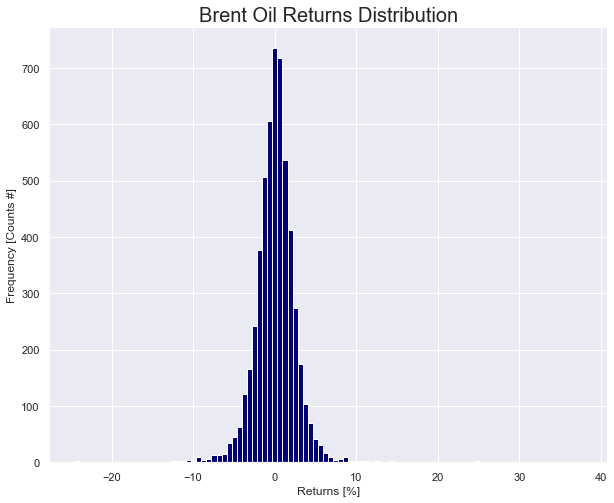

In [11]:
plt.figure(figsize = (10, 8))
plt.hist(x = brent_change, bins = brent_histo[1], color = "navy")
plt.title(label = "Brent Oil Returns Distribution", fontsize = 20)
plt.xlabel(xlabel = "Returns [%]")
plt.ylabel(ylabel = "Frequency [Counts #]")
plt.show()

## Monte Carlo function (General).

In [12]:
# Creating a function here which takes several inputs and returns visualizations of a monte carlo sim.
# Nested loops, not ideal but it works.

def Monte_Carlo(n_sims, n_days, hist_data, start_price):
    # General Monte Carlo Simulator for any markets.
    # Takes a number of simulations, number of days, historical returns data and a start price.
    # From that it attempts to generate several possible paths based on statistical characteristics.
    # Assumes a normal distribution for returns (Questionable.)
    plt.figure(figsize = (10, 8))
    for n in range(0, n_sims):
        sim_mean = np.mean(a = brent_change)
        sim_std = np.std(a = brent_change)
        sim_arr = np.array([start_price])
        price_change_arr = np.array([])
        for i in range(0, n_days):
            daily_change_pct = np.random.normal(loc = sim_mean, scale = sim_std)/100
            daily_change = daily_change_pct*sim_arr[-1]
            close_price = sim_arr[-1] + daily_change
            sim_arr = np.append(arr = sim_arr, values = close_price)
        plt.plot(sim_arr, label = ("Simulation " + str(n + 1)), lw = 1.6)
    plt.title(label = "Monte Carlo Sim", fontsize = 25)
    plt.legend()
    plt.xlabel(xlabel = "Days [#]", fontsize = 15)
    plt.ylabel(ylabel = "Price [$]", fontsize = 15)
    return plt.show()

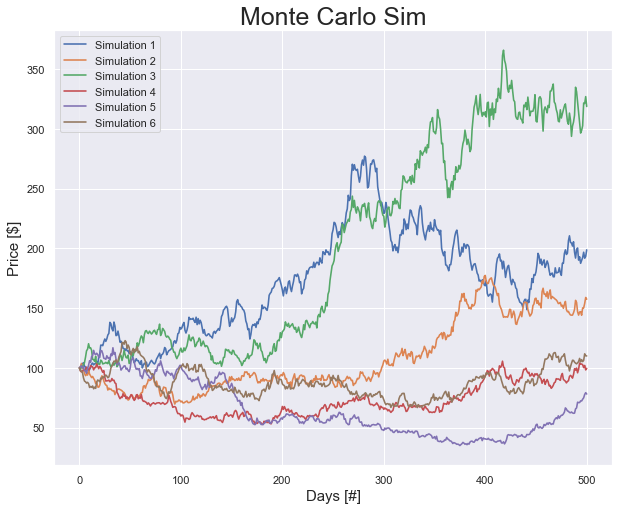

In [13]:
Monte_Carlo(n_sims = 6, n_days = 500, hist_data = brent_change, start_price = 100)

## Another example with the S&P 500.

In [14]:
es_df = pdr.get_data_yahoo("ES=F", start_date, end_date)
es_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-09-18,1489.75,1462.25,1485.25,1467.5,104794.0,1467.5
2000-09-19,1482.75,1466.75,1467.00,1478.5,103371.0,1478.5
2000-09-20,1480.50,1450.25,1478.75,1469.5,109667.0,1469.5
2000-09-21,1474.00,1455.50,1470.25,1469.5,98528.0,1469.5
2000-09-22,1471.00,1436.75,1454.75,1468.5,97416.0,1468.5


In [15]:
es_df["% Change"] = es_df["Close"].pct_change()
es_df["% Change"] = es_df["% Change"]*100
es_df.head()

,High,Low,Open,Close,Volume,Adj Close,% Change
Date,,,,,,,
2000-09-18,1489.75,1462.25,1485.25,1467.5,104794.0,1467.5,NaN
2000-09-19,1482.75,1466.75,1467.00,1478.5,103371.0,1478.5,0.749574
2000-09-20,1480.50,1450.25,1478.75,1469.5,109667.0,1469.5,-0.608725
2000-09-21,1474.00,1455.50,1470.25,1469.5,98528.0,1469.5,0.000000
2000-09-22,1471.00,1436.75,1454.75,1468.5,97416.0,1468.5,-0.068050


In [16]:
es_change = es_df["% Change"].to_numpy()
es_change = np.delete(arr = es_change, obj = [0])
es_change

array([ 0.74957411, -0.60872506,  0.        , ...,  2.24089636,
       -0.2739726 ,  0.02861722])

In [17]:
es_histo = np.histogram(a = es_change, bins = 100)

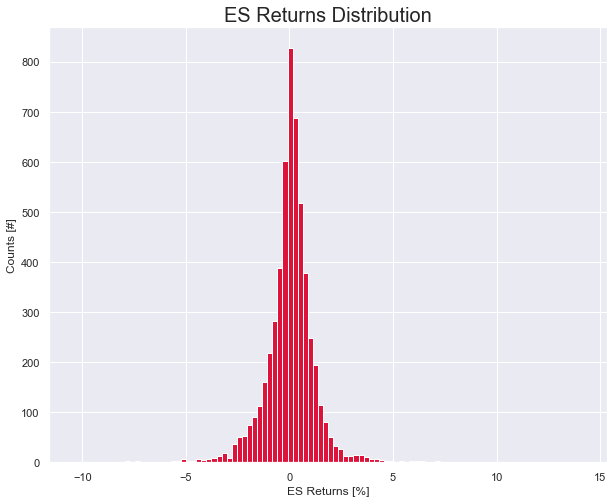

In [18]:
plt.figure(figsize = (10, 8))
plt.hist(x = es_change, bins = es_histo[1], color = "crimson")
plt.title(label = "ES Returns Distribution", fontsize = 20)
plt.xlabel(xlabel = "ES Returns [%]")
plt.ylabel(ylabel = "Counts [#]")
plt.show()

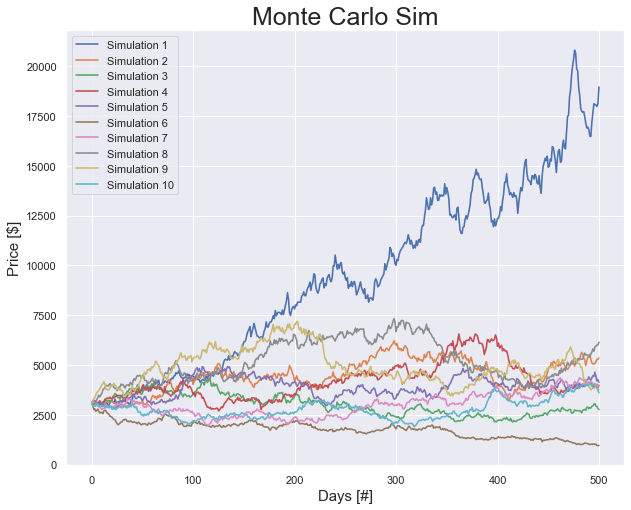

In [19]:
# Monte Carlo.
Monte_Carlo(n_sims = 10, n_days = 500, hist_data = es_change, start_price = 3100)